# Example 1. Authorizing an application to access Twitter account data

In [1]:
import twitter
# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = '6wqmAA369v9LKAM1iEEmworfI'
CONSUMER_SECRET ='ZpGKzYbc9BGKyarLtrcg8DVpiYjbsAww7v2fgr0eres2r1vgUN'
OAUTH_TOKEN = '842787201540915202-9HyTDqDstoubiShHeNxA6tk5CPY0vvG'
OAUTH_TOKEN_SECRET = 'b2sKJWNi4nq1gfJo5Twqwb3H8HPwh14yzJ3lpfCUWXKYb'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print twitter_api

# Example 2. Retrieving trends

In [2]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print world_trends
print
print us_trends

[{u'created_at': u'2017-03-17T17:58:39Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23StPatricksDay', u'query': u'%23StPatricksDay', u'tweet_volume': 619253, u'name': u'#StPatricksDay', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%D8%A7%D9%81%D8%B6%D9%84_%D8%B3%D9%86_%D9%84%D8%B2%D9%88%D8%A7%D8%AC_%D8%A7%D9%84%D8%B1%D8%AC%D9%84_%D9%88%D8%A7%D9%84%D9%85%D8%B1%D8%A7%D9%87', u'query': u'%23%D8%A7%D9%81%D8%B6%D9%84_%D8%B3%D9%86_%D9%84%D8%B2%D9%88%D8%A7%D8%AC_%D8%A7%D9%84%D8%B1%D8%AC%D9%84_%D9%88%D8%A7%D9%84%D9%85%D8%B1%D8%A7%D9%87', u'tweet_volume': 15905, u'name': u'#\u0627\u0641\u0636\u0644_\u0633\u0646_\u0644\u0632\u0648\u0627\u062c_\u0627\u0644\u0631\u062c\u0644_\u0648\u0627\u0644\u0645\u0631\u0627\u0647', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23BuenViernes', u'query': u'%23BuenViernes', u'tweet_volume': 27368, u'name': u'#BuenViernes', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23AskZara', u'que

# Example 3. Displaying API responses as pretty-printed JSON

In [10]:
import json

print json.dumps(world_trends, indent=1)
print
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2017-03-17T17:58:39Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23StPatricksDay", 
    "query": "%23StPatricksDay", 
    "tweet_volume": 619253, 
    "name": "#StPatricksDay", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%81%D8%B6%D9%84_%D8%B3%D9%86_%D9%84%D8%B2%D9%88%D8%A7%D8%AC_%D8%A7%D9%84%D8%B1%D8%AC%D9%84_%D9%88%D8%A7%D9%84%D9%85%D8%B1%D8%A7%D9%87", 
    "query": "%23%D8%A7%D9%81%D8%B6%D9%84_%D8%B3%D9%86_%D9%84%D8%B2%D9%88%D8%A7%D8%AC_%D8%A7%D9%84%D8%B1%D8%AC%D9%84_%D9%88%D8%A7%D9%84%D9%85%D8%B1%D8%A7%D9%87", 
    "tweet_volume": 15905, 
    "name": "#\u0627\u0641\u0636\u0644_\u0633\u0646_\u0644\u0632\u0648\u0627\u062c_\u0627\u0644\u0631\u062c\u0644_\u0648\u0627\u0644\u0645\u0631\u0627\u0647", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23BuenViernes", 
    "query": "%23BuenViernes", 
    "tweet_volume": 27368, 
    "name": "#BuenViernes", 
    "promote

# Example 4. Computing the intersection of two sets of trends

In [ ]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

# Example 5. Collecting search results

In [18]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json

q = '#StPatricksDay' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses, indent=4)

#for tweet in statuses:
#    for user_mention in tweet["entities"]["user_mentions"]:
#        print user_mention["screen_name"]


Length of statuses 100
Length of statuses 200
Length of statuses 235
[
    {
        "contributors": null, 
        "truncated": false, 
        "text": "RT @misterprinty: Happy #StPatricksDay! Follow &amp; RT us here @misterprinty to #win to a \u00a320 Amazon voucher! #Competition #fridayfreebie #sha\u2026", 
        "is_quote_status": false, 
        "in_reply_to_status_id": null, 
        "id": 842801014440890368, 
        "favorite_count": 0, 
        "entities": {
            "symbols": [], 
            "user_mentions": [
                {
                    "id": 753621928255037444, 
                    "indices": [
                        3, 
                        16
                    ], 
                    "id_str": "753621928255037444", 
                    "screen_name": "misterprinty", 
                    "name": "Mr Printy"
                }, 
                {
                    "id": 753621928255037444, 
                    "indices": [
                        64,

# Example 6. Extracting text, screen names, and hashtags from tweets

In [19]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @misterprinty: Happy #StPatricksDay! Follow &amp; RT us here @misterprinty to #win to a \u00a320 Amazon voucher! #Competition #fridayfreebie #sha\u2026", 
 "RT @CFOSofficial: Happy #StPatricksDay to the Irish Lass Kicker @BeckyLynchWWE \ud83c\udf40 #WWE #CFOS https://t.co/pAUhgVwIqT", 
 "The Sour Irishman\n#stpatricksday \n#marchmadness @ Buffalo Wild Wings https://t.co/z2JjmHbExk", 
 "RT @eevriviades: Saint Patrick, the Patron Saint of #Ireland depicted on an Orthodox icon. Happy #StPatricksDay to all https://t.co/wV1yVmD\u2026", 
 "RT @sarahpearson80: Love what Auld Shillelagh have done with the place for #StPatricksDay celebrates @StokeyUpdates @Stokey_News @Jules_pea\u2026"
]
[
 "misterprinty", 
 "misterprinty", 
 "CFOSofficial", 
 "BeckyLynchWWE", 
 "eevriviades"
]
[
 "StPatricksDay", 
 "win", 
 "Competition", 
 "fridayfreebie", 
 "StPatricksDay"
]
[
 "RT", 
 "@misterprinty:", 
 "Happy", 
 "#StPatricksDay!", 
 "Follow"
]


# Example 7. Creating a basic frequency distribution from the words in tweets

In [22]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'#StPatricksDay', 165), (u'RT', 145), (u'Happy', 73), (u'to', 68), (u'the', 50), (u'a', 49), (u'of', 34), (u'For', 28), (u'#StPatricksDay!', 27), (u'and', 26)]

[(u'electronicarts', 4), (u'EASPORTSFIFA', 4), (u'OnlyInBOS', 3), (u'baseballhall', 2), (u'AmazingPhil', 2), (u'GemmaAnneStyles', 2), (u'Dbacks', 2), (u'CollinsKey', 2), (u'misterprinty', 2), (u'NiallOfficial', 2)]

[(u'StPatricksDay', 211), (u'TENDER', 11), (u'stpatricksday', 11), (u'JOB', 10), (u'green', 3), (u'marchmadness', 3), (u'Irish', 2), (u'Recipe', 2), (u'FridayFeeling', 2), (u'fbf', 2)]



# Example 8. Using prettytable to display tuples in a nice tabular format

In [23]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+-----------------+-------+
| Word            | Count |
+-----------------+-------+
| #StPatricksDay  |   165 |
| RT              |   145 |
| Happy           |    73 |
| to              |    68 |
| the             |    50 |
| a               |    49 |
| of              |    34 |
| For             |    28 |
| #StPatricksDay! |    27 |
| and             |    26 |
+-----------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| electronicarts  |     4 |
| EASPORTSFIFA    |     4 |
| OnlyInBOS       |     3 |
| baseballhall    |     2 |
| AmazingPhil     |     2 |
| GemmaAnneStyles |     2 |
| Dbacks          |     2 |
| CollinsKey      |     2 |
| misterprinty    |     2 |
| NiallOfficial   |     2 |
+-----------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| StPatricksDay |   211 |
| TENDER        |    11 |
| stpatricksday |    11 |
| JOB           |    10 |
| green         |     3 |
| marchm

# Example 9. Calculating lexical diversity for tweets

In [24]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.496387718242
0.912037037037
0.394673123487
14.1361702128


# Example 10. Finding the most popular retweets

In [25]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 9254  | AmazingPhil    | RT @AmazingPhil: HAPPY #StPatricksDay! *throws     |
|       |                | lucky charms at you* https://t.co/CpvduwSc4Q       |
| 9254  | AmazingPhil    | RT @AmazingPhil: HAPPY #StPatricksDay! *throws     |
|       |                | lucky charms at you* https://t.co/CpvduwSc4Q       |
| 4634  | electronicarts | RT @electronicarts: Happy #StPatricksDay! We're    |
|       |                | giving away an @EASPORTSFIFA St Patrick's Day      |
|       |                | Green Team kit! For a chance to win RT this p…     |
| 4634  | electronicarts | RT @electronicarts: Happy #StPatricksDay! We're    |
|       |                | giving away an @EASPORTSFIFA St Patrick's Day      |
|       |                | Green Team ki

# Example 12. Plotting frequencies of words

[165, 145, 73, 68, 50, 49, 34, 28, 27, 26, 23, 22, 22, 20, 20, 18, 17, 17, 16, 16, 14, 14, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

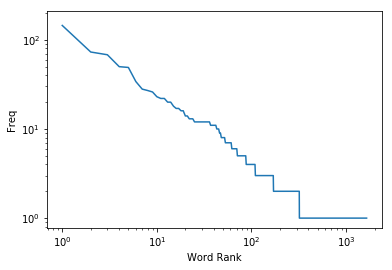

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)
print word_counts


plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Example 14. Generating a histogram of retweet counts

[416, 21, 41, 2, 1, 2, 127, 1, 346, 312, 23, 33, 43, 22, 11, 3, 4, 931, 364, 5, 783, 6, 21, 803, 80, 10, 1, 10, 44, 287, 20, 183, 4634, 6, 2, 62, 36, 1, 3, 1400, 8, 1819, 1981, 95, 3, 2279, 346, 3, 345, 7, 13, 40, 313, 1, 1, 73, 1, 5, 239, 3, 69, 1, 232, 18, 1408, 651, 2, 20, 304, 9254, 1, 1, 392, 2, 236, 122, 1, 1, 9254, 4634, 14, 6, 1, 79, 24, 73, 92, 75, 60, 12, 1819, 5, 31, 3, 7, 59, 2, 30, 18, 431, 1, 108, 2, 623, 73, 783, 59, 2, 159, 4634, 2779, 331, 6, 2, 147, 10, 137, 1, 110, 32, 246, 64, 3, 25, 4634, 21, 73, 1, 1, 16, 108, 100]


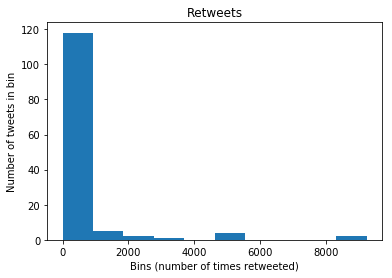

In [28]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts